In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sonar.all-data.csv')

In [ ]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Label'])

In [ ]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1


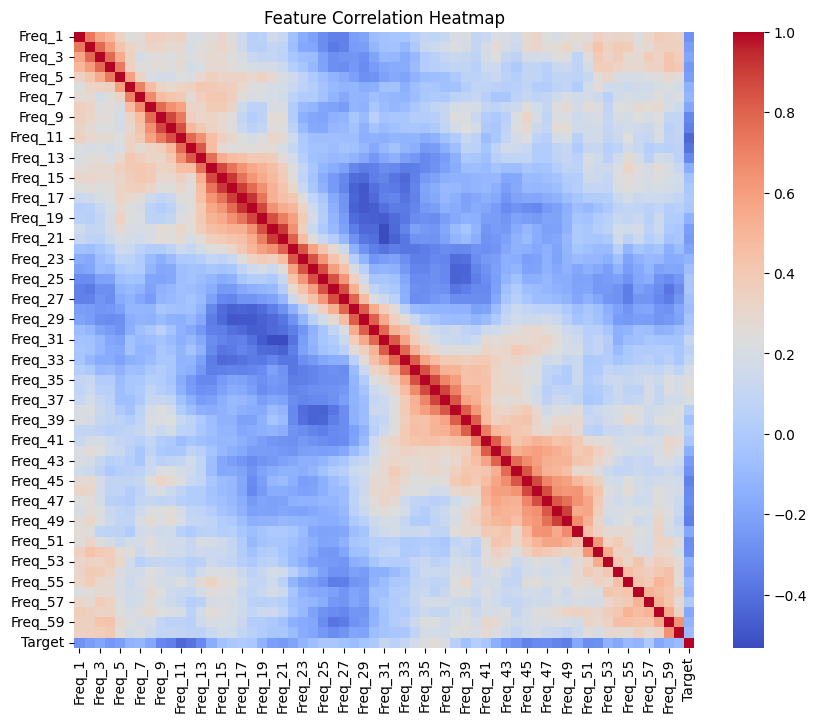

In [ ]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Label', axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(['Label' , 'Target'] , axis = 1 )
y = df['Target']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , stratify=y , random_state=42)

In [ ]:
#pipeline
pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('knn' , KNeighborsClassifier())
])

In [ ]:
param_grid = {
    'knn__n_neighbors': list(range(1,31)),
    'knn__metric': ['euclidean' , 'manhattan' , 'minkowski']
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [ ]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 1}
Best Cross-Validation Score: 0.8398293029871977


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
# Print accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test Accuracy: 0.8095238095238095
Confusion Matrix:
 [[10  1]
 [ 3  7]]
Classification Report:
               precision    recall  f1-score   support

           M       0.77      0.91      0.83        11
           R       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21



In [ ]:
# using model
new_sample = np.array([[0.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111,
                        0.2872, 0.3071, 0.5281, 0.5071, 0.4791, 0.5631, 0.6291, 0.6731, 0.7351, 0.7201,
                        0.6971, 0.6521, 0.5531, 0.4771, 0.4011, 0.3551, 0.3171, 0.2711, 0.2511, 0.2011,
                        0.1511, 0.1291, 0.1011, 0.0911, 0.0811, 0.0711, 0.0651, 0.0591, 0.0531, 0.0491,
                        0.0411, 0.0351, 0.0311, 0.0271, 0.0231, 0.0211, 0.0191, 0.0171, 0.0151, 0.0131,
                        0.0111, 0.0091, 0.0071, 0.0051, 0.0031, 0.0021, 0.0011, 0.0001, 0.0001, 0.0001]])

In [ ]:
# Standardize the new data
new_sample_scaled = grid_search.best_estimator_.named_steps['scaler'].transform(new_sample)

# Predict the label
predicted_label = grid_search.best_estimator_.named_steps['knn'].predict(new_sample_scaled)

# Convert numerical prediction back to 'R' or 'M'
predicted_label = label_encoder.inverse_transform(predicted_label)

print("Predicted label:", predicted_label[0])


Predicted label: M


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
